# Importing Data and Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import io
import scipy
import statistics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import graphviz

In [2]:
from google.colab import files
uploaded = files.upload()

Saving rawdata.xlsx to rawdata.xlsx


In [3]:
df = pd.read_excel(io.BytesIO(uploaded['rawdata.xlsx']))
df

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,F,35.0,NaN,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,M,39.0,general payer1,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,F,43.0,NaN,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,F,45.0,NaN,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,M,33.0,general payer1,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1288,70100285,NaN,F,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,1289,70100286,NaN,M,18.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4500.0,7.0,Saturday
1290,1290,70100287,NaN,M,35.0,general payer3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1291,1291,70100288,NaN,F,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  1293 non-null   int64  
 1   Customer_ID         1293 non-null   int64  
 2   Response            1003 non-null   object 
 3   Sex                 1232 non-null   object 
 4   Age                 1232 non-null   float64
 5   Job                 771 non-null    object 
 6   questionnaire1      1095 non-null   float64
 7   questionnaire2      1095 non-null   float64
 8   questionnaire3      1095 non-null   float64
 9   questionnaire4      1095 non-null   float64
 10  questionnaire5      1095 non-null   float64
 11  avg_charge          1033 non-null   float64
 12  charge_avg_per_mon  1033 non-null   float64
 13  charge_Monday       567 non-null    float64
 14  contraction_day     1086 non-null   float64
 15  contraction_day_JP  1086 non-null   object 
dtypes: flo

In [6]:
df.shape

(1293, 16)

# Univariate Analysis

### Purpose : Understand the distribution and value of the data, Choose data to further analyze it with Bivariate



### Data Type and Choosing Analysis Type

1. Group the data from category, continous or other
2. Choose the analysis form according to the data type



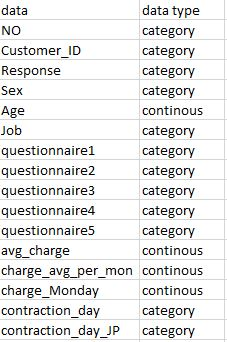

```
# Ini diformat sebagai kode
```



In [7]:
df.describe()
#Age has an outlier = 200
#All continous data still good since 75% of data falls under the STD+mean 

,NO,Customer_ID,Age,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day
count,1293.000000,1.293000e+03,1232.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1033.000000,1033.000000,567.000000,1086.000000
mean,646.773395,7.782217e+07,35.599838,0.259361,0.255708,0.267580,0.247489,0.250228,23963.404647,26369.268151,43338.201058,4.023941
std,373.097702,4.153917e+06,12.291667,0.942759,0.935977,0.975288,0.914004,0.925683,18246.970087,20541.914763,55620.324443,2.043621
min,1.000000,7.010000e+07,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2110.000000,2110.000000,2040.000000,1.000000
25%,324.000000,8.000302e+07,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9838.000000,10446.000000,8385.000000,2.000000
50%,647.000000,8.003941e+07,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19831.000000,21641.000000,24240.000000,4.000000
75%,970.000000,8.007616e+07,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32140.000000,35475.000000,52460.000000,6.000000
max,1292.000000,8.010989e+07,200.000000,5.000000,5.000000,5.000000,5.000000,5.000000,110525.000000,122530.000000,361110.000000,7.000000


In [8]:
df.isnull().sum()
#confirm many missing value (more than 30%)

NO                      0
Customer_ID             0
Response              290
Sex                    61
Age                    61
Job                   522
questionnaire1        198
questionnaire2        198
questionnaire3        198
questionnaire4        198
questionnaire5        198
avg_charge            260
charge_avg_per_mon    260
charge_Monday         726
contraction_day       207
contraction_day_JP    207
dtype: int64

In [9]:
#Remove missing value from response
df = df.dropna(subset = ['Response'])

In [10]:
#Check Duplicate
df[df.duplicated('Customer_ID')]

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
1000,1000,80109887,no reply,M,44.0,sole proprietorship,0.0,0.0,0.0,0.0,0.0,43745.0,43745.0,71090.0,3.0,Tuesday


In [11]:
#Remove Duplicate
df.drop_duplicates(subset ='Customer_ID', keep = 'first', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


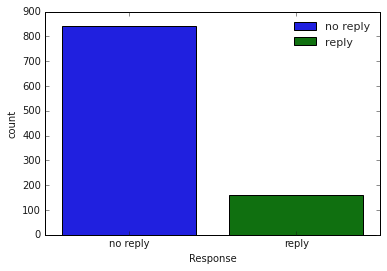

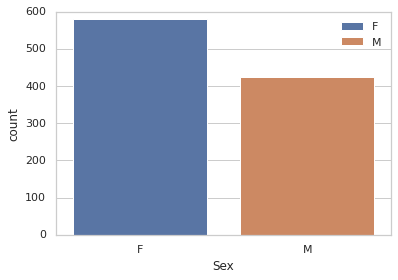

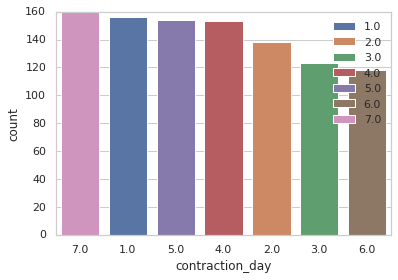

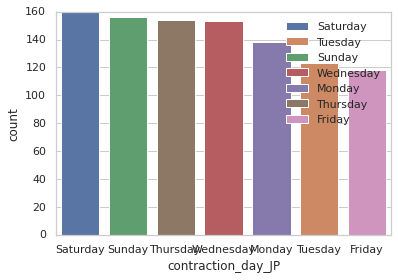

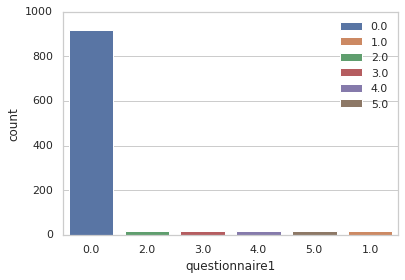

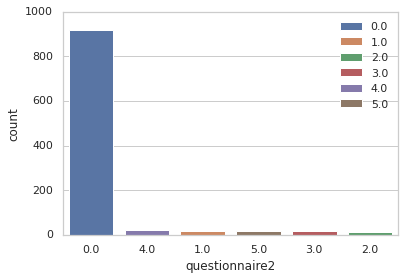

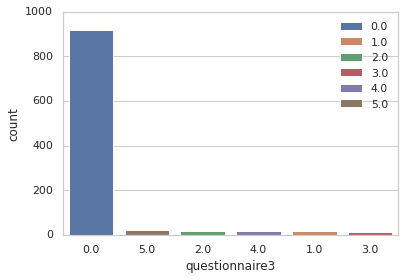

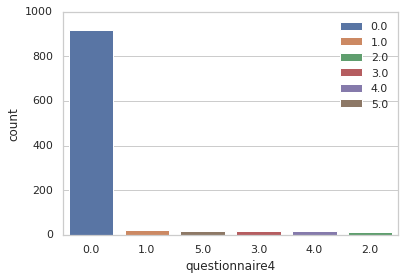

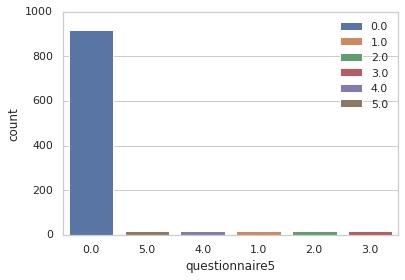

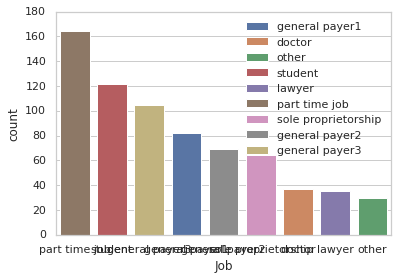

In [12]:
def countplot(var):
  sns.countplot(x = var, hue = var, data = df, order = df[var].value_counts().index, dodge = False)
  sns.set_theme(style = 'whitegrid')
  plt.legend(frameon = False)
  plt.show()
#category variable

countplot("Response") 
countplot("Sex")
countplot("contraction_day")
countplot("contraction_day_JP")
#Check if contraction_day and contraction_day_JP give the same info with bivariate analysis
countplot("questionnaire1")
countplot("questionnaire2")
countplot("questionnaire3")
countplot("questionnaire4")
countplot("questionnaire5")
#questionnaire seems only for responsive customer
countplot("Job")
#categorize general payer1,2,3 in the same category to general payer

In [13]:
df = df.replace(['general payer1','general payer2', 'general payer3'], 'general payer')

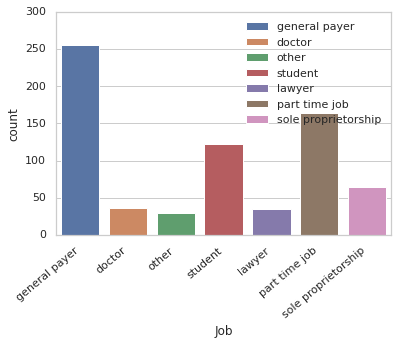

<Figure size 1080x360 with 0 Axes>

In [14]:
ax = sns.countplot(x="Job", hue = "Job", data=df, dodge = False)
plt.figure(figsize =(15,5))
ax.legend(frameon = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [15]:
df.Response.value_counts(normalize = True)

no reply    0.840319
reply       0.159681
Name: Response, dtype: float64

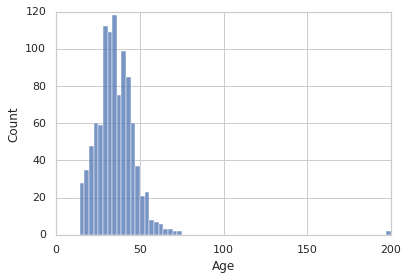

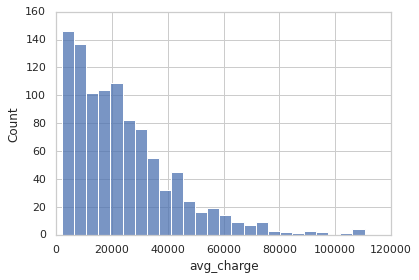

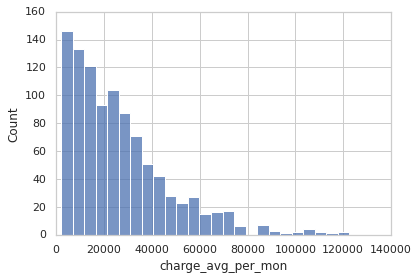

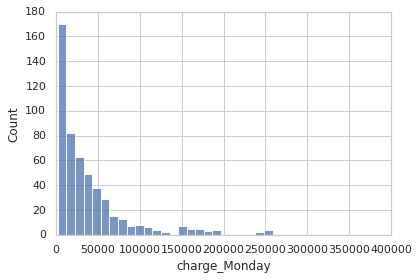

In [16]:
def histplot(var):
  sns.histplot(x = var, data = df)
  plt.show()

histplot('Age')
#confirm Age = 200 is an outlier by univariate analysis
histplot('avg_charge')
histplot('charge_avg_per_mon')
#Check if there is any correlation between avg_charge and charge_avg_per_mon with bivariate analysis
histplot('charge_Monday')

In [17]:
#Remove outlier
df = df[df.Age != 200]

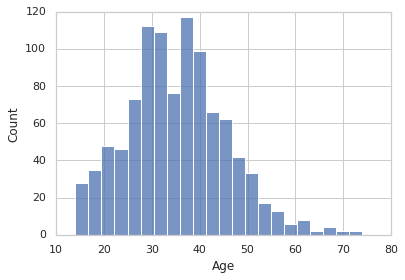

In [18]:
sns.histplot(x = 'Age', data = df)
#outlier dropped

## Summary:

1. Had done data cleansing and univariate analysis 
2. Ask what about the many missing value of responses to company
3. Ask does the questionnaire only filled with responsive customer and is it okay to categorize general payer 1,2,3 to a single general payer
4. Bivariate Analysis: contraction_day and contraction_day_JP, avg_charge and charge_avg_per_mon
```
# Ini diformat sebagai kode
```



# Bivariate Analysis

### Purpose : Understand the correlation or relationship between each data

This analysis usie Crosstabulation, Chi-square test, scatter plot and correlation coefficient, confirm by boxplot and distribution of data

In [19]:
#Crosstable
crosstab = pd.crosstab(df['contraction_day'], df['contraction_day_JP'], margins=True)

crosstab
#1-on-1 correspondency between contraction_day and contraction-day_JP
#confirm contraction_day and contraction_day_JP gave the same info

contraction_day_JP,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
contraction_day,,,,,,,,
1.0,0,0,0,156,0,0,0,156
2.0,0,138,0,0,0,0,0,138
3.0,0,0,0,0,0,123,0,123
4.0,0,0,0,0,0,0,152,152
5.0,0,0,0,0,154,0,0,154
6.0,118,0,0,0,0,0,0,118
7.0,0,0,159,0,0,0,0,159
All,118,138,159,156,154,123,152,1000


In [20]:
#Chi-Square Test
from scipy import stats
scipy.stats.chi2_contingency(crosstab)
#p-value = 0 rejecting null-hypothesis

(6000.0,
 0.0,
 49,
 array([[  18.408,   21.528,   24.804,   24.336,   24.024,   19.188,
           23.712,  156.   ],
        [  16.284,   19.044,   21.942,   21.528,   21.252,   16.974,
           20.976,  138.   ],
        [  14.514,   16.974,   19.557,   19.188,   18.942,   15.129,
           18.696,  123.   ],
        [  17.936,   20.976,   24.168,   23.712,   23.408,   18.696,
           23.104,  152.   ],
        [  18.172,   21.252,   24.486,   24.024,   23.716,   18.942,
           23.408,  154.   ],
        [  13.924,   16.284,   18.762,   18.408,   18.172,   14.514,
           17.936,  118.   ],
        [  18.762,   21.942,   25.281,   24.804,   24.486,   19.557,
           24.168,  159.   ],
        [ 118.   ,  138.   ,  159.   ,  156.   ,  154.   ,  123.   ,
          152.   , 1000.   ]]))

`For correlation coefficient we have to check what kind of correlation we use in Scatter plot by seeing the distribution graph. If it folllows normal distribution than use Spearman if it doesn't use Pearson's correlation coefficient`

Text(0, 0.5, 'avg_charge')

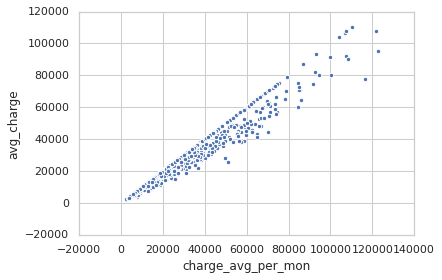

In [21]:
#Scatter Plot
plt.scatter(df['charge_avg_per_mon'], df['avg_charge'])
plt.xlabel('charge_avg_per_mon')
plt.ylabel('avg_charge')

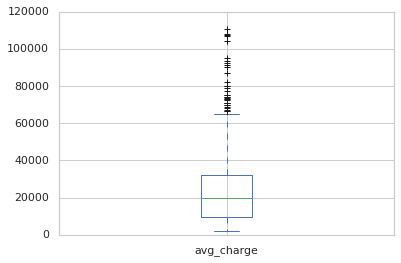

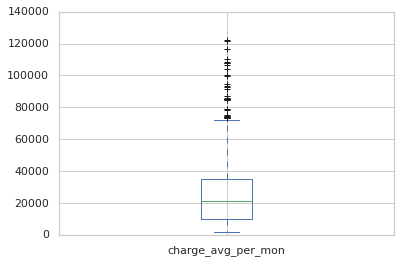

In [22]:
#Histogram of avg_charge and charge_avg_per_mon doesn't show normal distribution graph
#Check it again by boxplot

def boxplot(var):
  df[var].plot(kind='box')
  plt.show()

boxplot('avg_charge')
boxplot('charge_avg_per_mon')

#more clear that it doesn't represent normal distribution, but a normal bell-curved

In [23]:
#calculate covariance
np.cov(df['avg_charge'],df['charge_avg_per_mon'])

array([[3.31361656e+08, 3.66473679e+08],
       [3.66473679e+08, 4.21826608e+08]])

In [24]:
#correlation coefficient
df[['avg_charge', 'charge_avg_per_mon']].corr()

,avg_charge,charge_avg_per_mon
avg_charge,1.000000,0.980223
charge_avg_per_mon,0.980223,1.000000


In [25]:
#correlation coefficient with pearson
scipy.stats.pearsonr(df['charge_avg_per_mon'],df['avg_charge'])

(0.9802225230464987, 0.0)

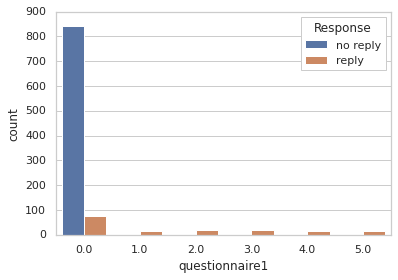

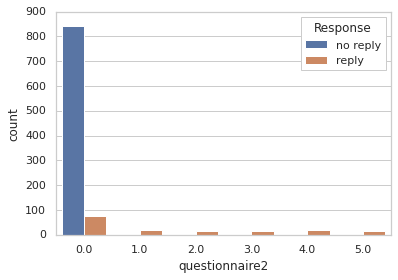

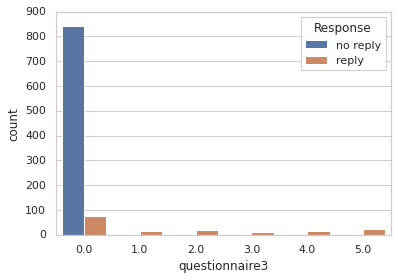

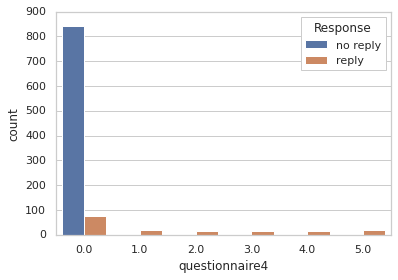

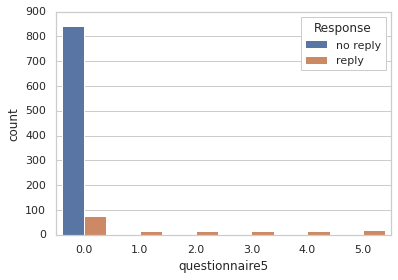

In [26]:
#questionnare only for responsive
def plot(var):
  sns.countplot(x=var, hue ="Response", data=df)
  plt.show()
  
plot('questionnaire1')
plot('questionnaire2')
plot('questionnaire3')
plot('questionnaire4')
plot('questionnaire5')

In [27]:
#Check the questionnaire with Response
def ct(var):
  crosstab = pd.crosstab(df['Response'], df[var], margins=True)
  print(crosstab)
  print('\n')

ct('questionnaire1')
ct('questionnaire2')
ct('questionnaire3')
ct('questionnaire4')
ct('questionnaire5')

#true questionnaire only for customer that response DM Campaign

questionnaire1  0.0  1.0  2.0  3.0  4.0  5.0   All
Response                                          
no reply        840    0    0    0    0    0   840
reply            75   15   19   18   17   16   160
All             915   15   19   18   17   16  1000


questionnaire2  0.0  1.0  2.0  3.0  4.0  5.0   All
Response                                          
no reply        840    0    0    0    0    0   840
reply            75   18   14   15   21   17   160
All             915   18   14   15   21   17  1000


questionnaire3  0.0  1.0  2.0  3.0  4.0  5.0   All
Response                                          
no reply        840    0    0    0    0    0   840
reply            75   15   18   13   17   22   160
All             915   15   18   13   17   22  1000


questionnaire4  0.0  1.0  2.0  3.0  4.0  5.0   All
Response                                          
no reply        840    0    0    0    0    0   840
reply            75   21   14   17   15   18   160
All             915   21 

## Summary:

1.  1-on-1 correspondency confirmed, drop between 'contraction_day' or 'contraction_day_JP'
2.  charge_avg_per_mon and avg_charge is correlated should keep both as it shows positive correlation
3. questionnaire confirmed only filled by responsive customer

```
# Ini diformat sebagai kode
```



# Multivariate Analysis

### Purpose : Customer Segmentation

In [28]:
df.head()

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,F,35.0,NaN,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,M,39.0,general payer,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,F,43.0,NaN,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,F,45.0,NaN,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,M,33.0,general payer,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday


In [29]:
df.columns

Index(['NO', 'Customer_ID', 'Response', 'Sex', 'Age', 'Job', 'questionnaire1',
       'questionnaire2', 'questionnaire3', 'questionnaire4', 'questionnaire5',
       'avg_charge', 'charge_avg_per_mon', 'charge_Monday', 'contraction_day',
       'contraction_day_JP'],
      dtype='object')

In [30]:
#Since it has more than 30% missing value fill the missing value with 0
df = df.fillna(0)

In [31]:
feat = ['Response', 'Sex', 'Age', 'Job', 'avg_charge', 'charge_avg_per_mon', 'charge_Monday', 'contraction_day']
target = 'Response'

In [32]:
df1 = df[feat]

In [33]:
df1 = pd.get_dummies(df1, drop_first=True)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   float64
 1   avg_charge               1000 non-null   float64
 2   charge_avg_per_mon       1000 non-null   float64
 3   charge_Monday            1000 non-null   float64
 4   contraction_day          1000 non-null   float64
 5   Response_reply           1000 non-null   uint8  
 6   Sex_M                    1000 non-null   uint8  
 7   Job_doctor               1000 non-null   uint8  
 8   Job_general payer        1000 non-null   uint8  
 9   Job_lawyer               1000 non-null   uint8  
 10  Job_other                1000 non-null   uint8  
 11  Job_part time job        1000 non-null   uint8  
 12  Job_sole proprietorship  1000 non-null   uint8  
 13  Job_student              1000 non-null   uint8  
dtypes: float64(5), uint8(9)
m

In [35]:
target = 'Response_reply'
X = df1[df1.columns[df1.columns != target]]
y = df1[target]

In [93]:
#Splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
tree_data = DecisionTreeClassifier(criterion= 'entropy', max_depth=3, min_samples_leaf=10)
tree_data.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

In [94]:
y_train_pred = tree_data.predict(X_train)
y_pred = tree_data.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [96]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.8150


In [97]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score with criterion entropy: 0.8462


In [98]:
print('Training set score: {:.4f}'.format(tree_data.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(tree_data.score(X_test, y_test)))

Training set score: 0.8462
Test set score: 0.8150


[Text(0.5, 0.875, 'X[1] <= 10001.5\nentropy = 0.634\nsamples = 1000\nvalue = [840, 160]'),
 Text(0.25, 0.625, 'X[3] <= 7790.0\nentropy = 0.338\nsamples = 255\nvalue = [239, 16]'),
 Text(0.125, 0.375, 'X[2] <= 6012.5\nentropy = 0.264\nsamples = 223\nvalue = [213, 10]'),
 Text(0.0625, 0.125, 'entropy = 0.403\nsamples = 112\nvalue = [103, 9]'),
 Text(0.1875, 0.125, 'entropy = 0.074\nsamples = 111\nvalue = [110, 1]'),
 Text(0.375, 0.375, 'X[5] <= 0.5\nentropy = 0.696\nsamples = 32\nvalue = [26, 6]'),
 Text(0.3125, 0.125, 'entropy = 0.831\nsamples = 19\nvalue = [14, 5]'),
 Text(0.4375, 0.125, 'entropy = 0.391\nsamples = 13\nvalue = [12, 1]'),
 Text(0.75, 0.625, 'X[0] <= 33.5\nentropy = 0.708\nsamples = 745\nvalue = [601, 144]'),
 Text(0.625, 0.375, 'X[5] <= 0.5\nentropy = 0.862\nsamples = 249\nvalue = [178, 71]'),
 Text(0.5625, 0.125, 'entropy = 0.975\nsamples = 162\nvalue = [96, 66]'),
 Text(0.6875, 0.125, 'entropy = 0.317\nsamples = 87\nvalue = [82, 5]'),
 Text(0.875, 0.375, 'X[5] <= 0.5\

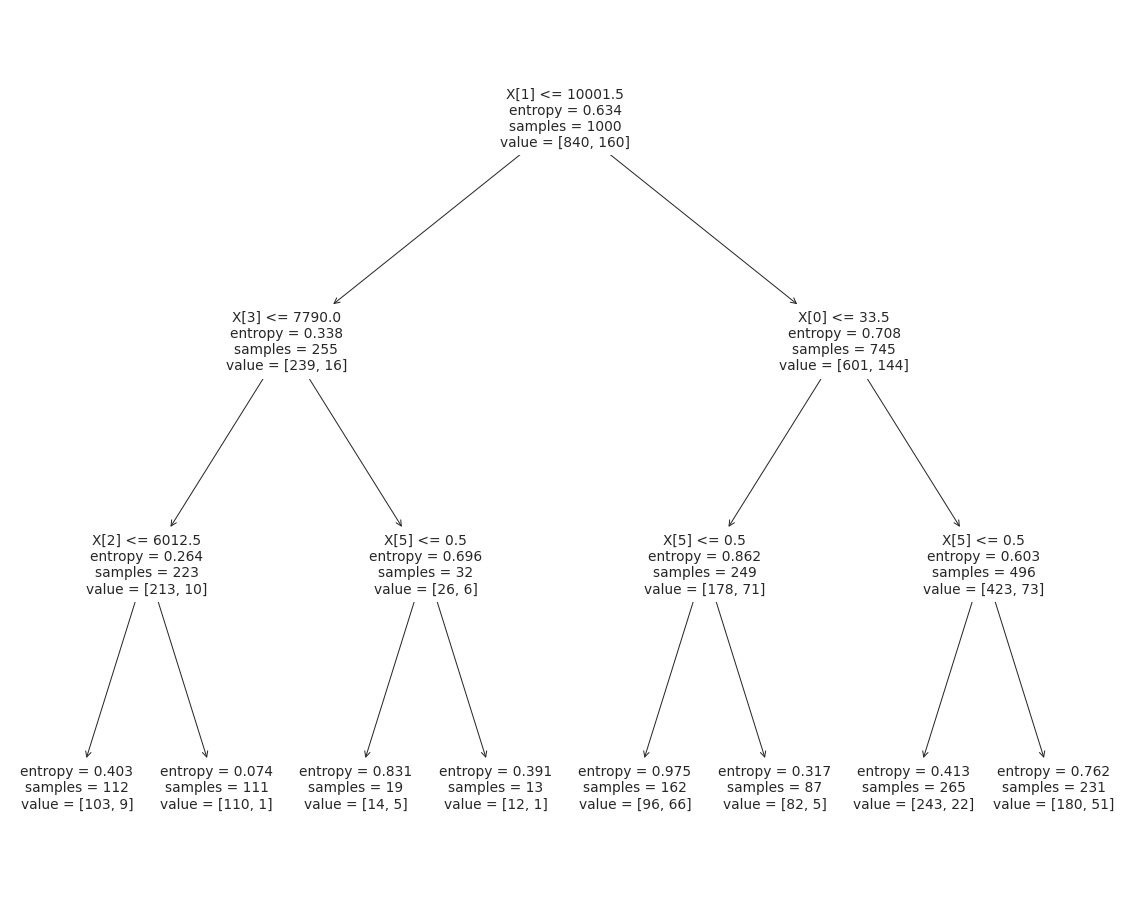

In [99]:
plt.figure(figsize = (20,16))
tree.plot_tree(tree_data)

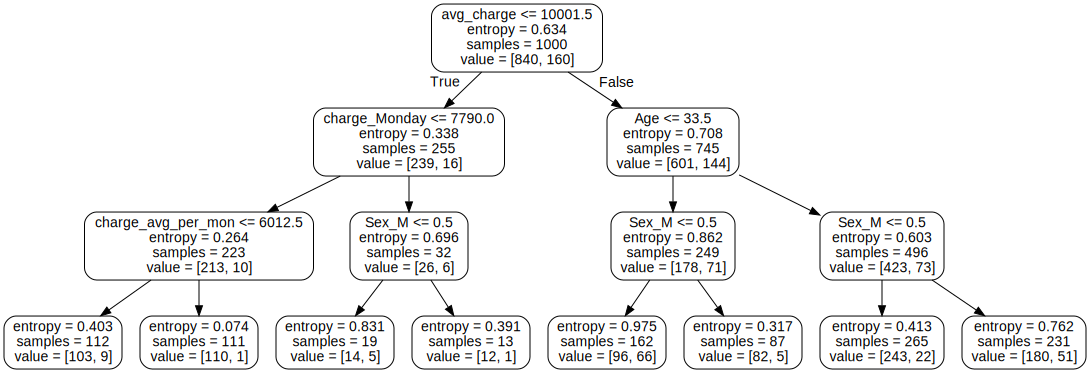

In [100]:
dot_data = tree.export_graphviz(tree_data, feature_names=X.columns, filled=False, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[163   0]
 [ 37   0]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       163
           1       0.00      0.00      0.00        37

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.73       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
